In [13]:
import numpy as np
from scipy import stats

### Предполоагаем что закон распределения наблюдений нормальный 

(хотя вроде это не обязательно для ttesta Стьюдента)

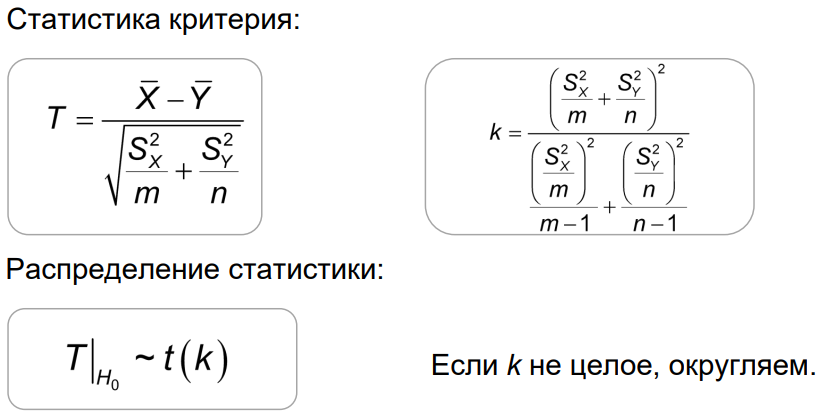

In [14]:
# исходные данные

x = np.array([30,28,46,42,35,33,44,43,31,38])
y = np.array([26,38,39,28,30,27,32,35])

In [16]:
# руками, общий метод, дисперсии НЕ предполагаются раными

m = x.size
n = y.size

s2x = stats.tstd(x)**2   # можно и так, тогда T и P значения совпадают с ttest_ind     (это мой вариант)
s2y = stats.tstd(y)**2
T = (x.mean() - y.mean()) / (s2x/m + s2y/n)**0.5      # статистика критерия  (это не мой вариант)

#s2x = x.std()**2   # выборочная дисперсия      (это не мой вариант)
#s2y = y.std()**2
# а можно и так посчитать при s2x = x.std()**2  и s2y = y.std()**2 и так значения тоже совпадают с ttest_ind
#T = (x.mean() - y.mean()) / (s2x/(m-1) + s2y/(n-1)) ** 0.5     #  (это мой вариант с -1)

df = round((s2x/m + s2y/n)**2 / ((s2x/m)**2/(m - 1) + (s2y/n)**2/(n - 1)))

t = stats.t(df)     # распределение Стьюдента с df степеней свободы
           
P = 1 - t.cdf(T)   # правая критическая область

print('Statistic:', T, ',  p_value:', P)

Statistic: 1.8938964781697485 ,  p_value: 0.03823198687239826


In [20]:
# используем ttest_ind  правая критическая область  Welch’s t-test

stats.ttest_ind(x, y, alternative= 'greater', equal_var= False)

Ttest_indResult(statistic=1.8938964781697485, pvalue=0.038236545313955844)

In [21]:
# используем ttest_ind  двустороння альтернатива, предполагается что дисперсии выборок равны и equal_var= True

stats.ttest_ind(x, y) 

Ttest_indResult(statistic=1.8380153152088796, pvalue=0.08469997574875773)

полученное для двусторонней альтернативы p_value очень близко к 0.05, а при односторонней меньше 0.05 и это сигнал о том, что МАЛО данных

In [11]:
# perform Welch’s t-test

stats.ttest_ind(x, y, equal_var= False) 

Ttest_indResult(statistic=1.8938964781697485, pvalue=0.07647309062791169)

In [12]:
print(0.030901843780302585 * 2)

0.06180368756060517
